# PM2.5 Multi-method Regression
This is the Final Project of Intro to Machine Learning, by Peixuan Gao and Zhenghao Dong

## Project Aim: 
1. Try to build a regression model for PM2.5 level prediction based on multiple climate attributes
2. Try to apply different approachs and techniques from the lecture, and compare the performance between different techniques

### 1. Loading the data
#### 1.1 Loading the data from csv file
The data is get from: http://aqi.cga.harvard.edu/china/cumulative/

The data includes 10 attributes (pm10, o3, no2, so2, so2, co, temperture, dewpoint, pressure, humidity, wind) and 1 target value (pm25)

Cleaned data is stored in cleaned_data.csv, we read it by pandas library

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("./dataSet/cleaned_data.csv")

First, we try to observe the first 6 row of the data to see if the data is correctly loaded

In [3]:
df.head(6)

,pm25,pm10,o3,no2,so2,co,temperature,dewpoint,pressure,humidity,wind
0,134,81,31,20,15,14,20,10,1016,52,13
1,158,83,47,34,14,10,19,11,1016,60,9
2,147,100,39,31,11,9,19,11,1016,60,9
3,151,74,44,26,10,11,19,11,1016,60,9
4,78,51,39,7,2,9,22,8,1016,41,4
5,91,40,26,16,5,8,22,8,1016,41,4


We can clearly see the data is loaded correctly with the correct attribute name and target value

Then, let's try to convert the pandas dataframe into numpy array for further operations

In [4]:
data_total = np.array(df)

#### 1.2 Getting the training data and testing data
The dataset we get from database is large, we first try to print out the size of the dataset

In [5]:
data_total.shape

(93790, 11)

From the output, we can notice that the total data sample number is nearly 100000 samples, which means we can take half of it as the training data, and the rest as the training data.

We try to take 50000 data samples as the training data

In [6]:
ntr = 50000
data_train = data_total[:ntr]
data_test = data_total[ntr:]
print("training data shape: {0:d},{1:d}".format(data_train.shape[0], data_train.shape[1]))
print("testing data shape: {0:d},{1:d}".format(data_test.shape[0], data_test.shape[1]))

training data shape: 50000,11
testing data shape: 43790,11


Since the first column is the target value 'pm25', we try to get the attributes matrix X and target value vector y

In [7]:
ytrain = data_train[:,0]
ytest = data_test[:,0]
Xtrain = data_train[:,1:]
Xtest = data_test[:,1:]

### 2. Simple First-order Linear Regression
#### 2.1 Fitting the model
From the data, the first assumption appears in our mind is: would the modele be a simple first-order linear regression model?
The first-order linear regression model might be the simplest model, so we first try to use it to fit the data, to see how it performs

We try to import linear_model from sklearn library (Which is already built and well encapsulated, the APIs are super easy to use).
Here is the link of the documentation of sklearn.linear_model http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [8]:
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

regr = linear_model.LinearRegression()
regr.fit(Xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### 2.2 Predict the target value
After fitting the training data, we try to predict the target value by training data and testing data

We evalue the accuracy of the model prediction by Normalized RSS

In [9]:
ypred = regr.predict(Xtrain)

RSStrain = np.mean(((ypred-ytrain)**2)/(np.std(ytrain)**2))
print("Normalized RSS training = {0:f}".format(RSStrain))

ytestpred = regr.predict(Xtest)

RSStest = np.mean(((ytestpred-ytest)**2)/(np.std(ytest)**2))
print("Normalized RSS testing = {0:f}".format(RSStest))

Normalized RSS training = 0.489437
Normalized RSS testing = 0.542290


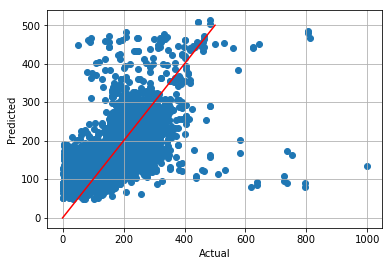

In [10]:
plt.scatter(ytest,ytestpred)
plt.plot([-1,500],[-1,500],'r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True)

From the Normalized RSS, we find the simple first-order linear regression is not that bad, but actually far from satisfaction, let's see what other model can do

### 3. Third-Order Linear Regression
Since the first-order linear regression is not that bad, it's intuitive for us to make the assumption: if we try to increase the order, would it performs better?

Based on that assumption, we try to expand out data into first-order, second-order and third-order data, the script of expanding the data is also in this repository:

#### 3.1 Loading the expanded third-order data
The expanded third-order data is stored in data_3.csv

In [11]:
df2 = pd.read_csv("./dataSet/data_3.csv")
df2.head(6)

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,23,24,25,26,27,28,29,30,31,32
0,0,134.0,81.0,31.0,20.0,15.0,14.0,20.0,10.0,1016.0,...,531441.0,29791.0,8000.0,3375.0,2744.0,8000.0,1000.0,1.048772e+09,140608.0,2197.0
1,1,158.0,83.0,47.0,34.0,14.0,10.0,19.0,11.0,1016.0,...,571787.0,103823.0,39304.0,2744.0,1000.0,6859.0,1331.0,1.048772e+09,216000.0,729.0
2,2,147.0,100.0,39.0,31.0,11.0,9.0,19.0,11.0,1016.0,...,1000000.0,59319.0,29791.0,1331.0,729.0,6859.0,1331.0,1.048772e+09,216000.0,729.0
3,3,151.0,74.0,44.0,26.0,10.0,11.0,19.0,11.0,1016.0,...,405224.0,85184.0,17576.0,1000.0,1331.0,6859.0,1331.0,1.048772e+09,216000.0,729.0
4,4,78.0,51.0,39.0,7.0,2.0,9.0,22.0,8.0,1016.0,...,132651.0,59319.0,343.0,8.0,729.0,10648.0,512.0,1.048772e+09,68921.0,64.0
5,5,91.0,40.0,26.0,16.0,5.0,8.0,22.0,8.0,1016.0,...,64000.0,17576.0,4096.0,125.0,512.0,10648.0,512.0,1.048772e+09,68921.0,64.0


In [12]:
data_3order = np.array(df2)[:,1:]
data_3order.shape

(93790, 33)

The first column of the data is the target value, we take it out as target value

In [13]:
data_3order_Y = data_3order[:, 0]

Note that the 12th column and the 23th column are the squared and cubed target value, we should remove them forn the attribute matrix

In [14]:
data_3order_X = data_3order[:, 1]
nfeature = len(data_3order[0])
for column in range(2,nfeature):
    if(column == 11 or column == 22):
        continue
    else:
        data_3order_X = np.column_stack((data_3order_X,data_3order[:, column]))

Let's print the shape of attribute matrix, the attribute number should be 10*3 = 30

#### 3.2 Getting the training data and training data
To be constant with the first-order linear regression, we take 50000 samples as the training sample, the rest as the test samples

In [15]:
X_train = data_3order_X[:ntr]
X_test = data_3order_X[ntr:]
y_train = data_3order_Y[:ntr]
y_test = data_3order_Y[ntr:]

print("X training data shape: {0:d},{1:d}".format(X_train.shape[0], X_train.shape[1]))
print("X testing data shape: {0:d},{1:d}".format(X_test.shape[0], X_test.shape[1]))
print("Y training data shape: {0:d}".format(y_train.shape[0]))
print("Y testing data shape: {0:d}".format(y_test.shape[0]))

X training data shape: 50000,30
X testing data shape: 43790,30
Y training data shape: 50000
Y testing data shape: 43790


#### 3.3 Fitting the data into linear regression model
We try to fitting the training data in the same way as above

In [16]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### 3.4 Predicting the data by trained third-order linear regression model
We try to predict the training data and testing data by the 3-order linear regression model.

We evalue the accuracy of the model prediction by Normalized RSS:
$$ Normalized\_RSS = \frac{1}{n}*\sum_{i=1}^{n}(\frac{({y}-\hat{y})^2}{(y-\bar{y})^2}) $$

In [17]:
ytr_pred = regr.predict(X_train)

RSStrain = np.mean(((ytr_pred-y_train)**2)/(np.std(y_train)**2))
print("Normalized RSS training = {0:f}".format(RSStrain))

yts_pred = regr.predict(X_test)

RSStest = np.mean(((yts_pred-y_test)**2)/(np.std(y_test)**2))
print("Normalized RSS testing = {0:f}".format(RSStest))

Normalized RSS training = 0.353774
Normalized RSS testing = 0.417474


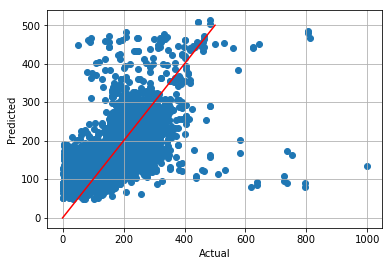

In [18]:
plt.scatter(ytest,ytestpred)
plt.plot([-1,500],[-1,500],'r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True)

From the Normalized RSS, we found the third-order linear regression model is better than the first-order by 0.13 on Normalized RSS, which means taking the polynominal elements into consideration would improve the model accuracy in our prediction

### 4. LASSO Regularization
As we have seen the third-order data matrix, we notice that we have total 30 attributes. From the lecture, we would like to first measure how each atrribute is related to the model and try to do the L1 Regularization

#### 4.1 Measure how each attribute is related to the model
First, we need to scale the data by sklearn.preprocessing. After that, we try to measure the Rsq of each atrribute to relect the relation to the model.  Let $R_k^2$ be the coefficient for predicting $y$ from the $k$-th predictor $x_k$, then we can get covariance:
$$R^2_k = \frac{|s_{x_k,y}|^2}{s_{x_k}^2 s_y^2}.$$


In [19]:
import sklearn.preprocessing
Xs = sklearn.preprocessing.scale(data_3order_X)
ys = sklearn.preprocessing.scale(data_3order_Y)

Xs_train = Xs[:ntr]
Xs_test = Xs[ntr:]
ys_train = ys[:ntr]
ys_test = ys[ntr:]

natt = len(data_3order_X[0])
xtrm = np.mean(Xs_train)
ytrm = np.mean(ys_train)
syy = np.mean((ys_train-ytrm)**2)
Rsq = np.zeros(natt)
beta0 = np.zeros(natt)
beta1 = np.zeros(natt)
for k in range(natt):
    Xtrm = np.mean(Xs_train[:,k])
    sxy = np.mean((Xs_train[:,k]-xtrm)*(ys_train-ytrm))
    sxx = np.mean((Xs_train[:,k]-xtrm)**2)
    beta1[k] = sxy/sxx
    beta0[k] = ytrm - beta1[k]*xtrm
    Rsq[k] = (sxy)**2/sxx/syy
    print("{0:2d} Rsq={1:f}".format(k,Rsq[k]))

 0 Rsq=0.340577
 1 Rsq=0.004405
 2 Rsq=0.229307
 3 Rsq=0.189153
 4 Rsq=0.099666
 5 Rsq=0.000680
 6 Rsq=0.017658
 7 Rsq=0.002402
 8 Rsq=0.009697
 9 Rsq=0.026142
10 Rsq=0.089431
11 Rsq=0.000121
12 Rsq=0.158362
13 Rsq=0.096179
14 Rsq=0.054109
15 Rsq=0.000326
16 Rsq=0.036131
17 Rsq=0.002544
18 Rsq=0.002261
19 Rsq=0.018191
20 Rsq=0.021647
21 Rsq=0.000002
22 Rsq=0.084827
23 Rsq=0.022314
24 Rsq=0.016909
25 Rsq=0.002197
26 Rsq=0.008725
27 Rsq=0.002685
28 Rsq=0.000222
29 Rsq=0.008573


/home/hadoop/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


We try to sort the attributes by their Rsq in a decreasing order, to see which attribute relates the most

In [20]:
d = 30
Isel = np.argsort(-Rsq)[:d]
print("The attributes' Rsq in decreasing order ", Isel)

The attributes' Rsq in decreasing order  [ 0  2  3 12  4 13 10 22 14 16  9 23 20 19  6 24  8 26 29  1 27 17  7 18 25
  5 15 28 11 21]


From the output, we can see that the first order pm10 attributes relates the most to the model. In the meantime, we find that a number of the attributes has Rsq larger than 0.01, which means those attributes do contributes to the model.

#### 4.2 LASSO L1 Regularzation
We using the LASSO API in sklearn.linear, which is also a well-encapsulated API that is easy to use. Here is the Documentation: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

For parameter alpha, we tried to select the best one in range 0.00001 to 1. Since we have a large dataset, we don't need the K-fold to do the cross-validation

We calculate the RSS of the predicted value and the original value to evaluate alpha

In [21]:
model = linear_model.Lasso(warm_start=True)
# Regularization values to test
nalpha = 30
alphas = np.logspace(-5,-1,nalpha)
RSS = np.zeros(nalpha)
for ia, a in enumerate(alphas):
    # Fit the model on the training data
    model.alpha = a
    model.fit(Xs_train,ys_train)
    # Compute the prediction error on the test data
    ys_test_pred = model.predict(Xs_test)
    RSS[ia] = np.mean(((ys_test_pred-ys_test)**2)/(np.std(ys_test)**2))

/home/hadoop/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Plotting the RSS against the selected alpha

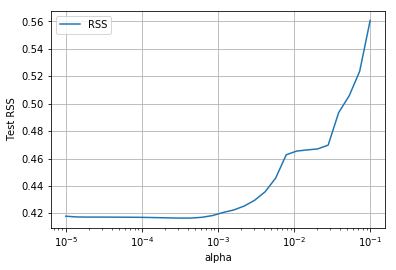

In [22]:
plt.semilogx(alphas, RSS)
plt.legend(['RSS'],loc='upper left')
plt.xlabel('alpha')
plt.ylabel('Test RSS')
plt.grid()
plt.show()

From the plot, we found the alpha = 0.0035 has the least mse, we try to apply it in the LASSO model

In [23]:
model = linear_model.Lasso(warm_start=True)
model.alpha = 0.00035
model.fit(Xs_train, ys_train)
ys_test_pred = model.predict(Xs_test)
RSStestLASSO = np.mean(((ys_test_pred-ys_test)**2)/(np.std(ys_test)**2))
print("Normalized RSS by LASSO = {0:f}".format(RSStestLASSO))

Normalized RSS by LASSO = 0.417535


/home/hadoop/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


From the RSS, we can see that the L1 Regularzation does not contribute a lot in out prediction model

Form our analysis, we con concludes that might because most of the attributes relates to the model

### 5. Neural Network
After using linear regression model in sklearn labrary, we try to build a simple 1 hidden-layer neural network by keras running on tensorflow

#### 5.1 Data Pre-processing
For Neural Network, the data should be scaled

In [24]:
data_total = np.array(df)
data_scale = sklearn.preprocessing.scale(data_total)
data_s_train = data_scale[:ntr]
data_s_test = data_scale[ntr:]

xstrain = data_s_train[:,1:]
xstest = data_s_test[:,1:]
ystrain = data_s_train[:,0]
ystest = data_s_test[:,0]

/home/hadoop/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


#### 5.2 Build the Neural Network with 10/20/40 hidden units

In [25]:
import keras

Using TensorFlow backend.


In [26]:
from keras.models import Model, Sequential
from keras.layers import Dense, Activation

Clear the session

In [27]:
import keras.backend as K
K.clear_session()

First, we tried to build a hidden-layer with 20 hidden-units, we select the ReLU as the activation function

#### 5.3.1 Fitting the data(10 hidden units)

We try to fitting the training data in the neural network, with Adam optimizer, learning rate = 0.01, and mse as loss function

In [28]:
nin = xstrain.shape[1]  # dimension of input data
nh = 10     # number of hidden units
nout = 1
model = Sequential()
model.add(Dense(nh, input_shape=(nin,),activation='relu',name='hidden'))
model.add(Dense(nout,activation=None,name='output'))

In [29]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 10)                110       
_________________________________________________________________
output (Dense)               (None, 1)                 11        
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [30]:
from keras import optimizers
opt = optimizers.Adam(lr=0.001)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['mean_squared_error'])
model.fit(xstrain, ystrain, epochs=100, batch_size=100, validation_data=(xstest,ystest),verbose=0)

#### 5.3.1.2 Predict target value on test data

We try to predict the target value on both training data and test data, and evaluate the accurate by Normalized RSS

In [31]:
ys_tr_pred = np.squeeze(model.predict(xstrain))
RSStrain = np.mean(((ys_tr_pred-ystrain)**2)/(np.std(ystrain)**2))
print("Normalized RSS training = {0:f}".format(RSStrain))

ys_ts_pred = np.squeeze(model.predict(xstest))
RSStest = np.mean(((ys_ts_pred-ystest)**2)/(np.std(ystest)**2))
print("Normalized RSS test = {0:f}".format(RSStest))

Normalized RSS training = 0.325335
Normalized RSS test = 0.404074


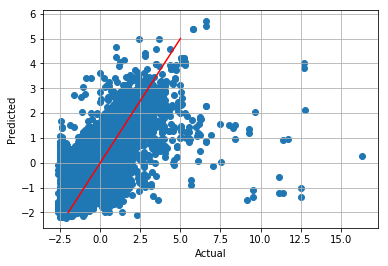

In [32]:
plt.scatter(ystest,ys_ts_pred)
plt.plot([-2,5],[-2,5],'r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True)

#### 5.3.2 Fitting the data(20 hidden units)

We try to fitting the training data in the neural network, with Adam optimizer, learning rate = 0.01, and mse as loss function

In [33]:
K.clear_session()
nin = xstrain.shape[1]  # dimension of input data
nh = 20     # number of hidden units
nout = 1
model = Sequential()
model.add(Dense(nh, input_shape=(nin,),activation='relu',name='hidden'))
model.add(Dense(nout,activation=None,name='output'))

In [34]:
from keras import optimizers
opt = optimizers.Adam(lr=0.001)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['mean_squared_error'])
model.fit(xstrain, ystrain, epochs=100, batch_size=100, validation_data=(xstest,ystest),verbose=0)

#### 5.3.2.2 Predict target value on test data

We try to predict the target value on both training data and test data, and evaluate the accurate by Normalized RSS# 

In [35]:
ys_tr_pred = np.squeeze(model.predict(xstrain))
RSStrain = np.mean(((ys_tr_pred-ystrain)**2)/(np.std(ystrain)**2))
print("Normalized RSS training = {0:f}".format(RSStrain))

ys_ts_pred = np.squeeze(model.predict(xstest))
RSStest = np.mean(((ys_ts_pred-ystest)**2)/(np.std(ystest)**2))
print("Normalized RSS test = {0:f}".format(RSStest))

Normalized RSS training = 0.312042
Normalized RSS test = 0.391214


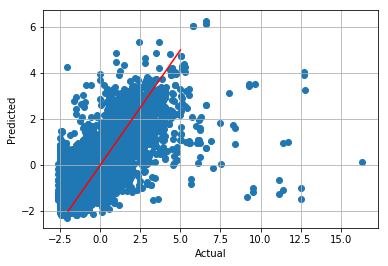

In [36]:
plt.scatter(ystest,ys_ts_pred)
plt.plot([-2,5],[-2,5],'r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True)

#### 5.3.3 Fitting the data(40 hidden units)

We try to fitting the training data in the neural network, with Adam optimizer, learning rate = 0.01, and mse as loss function

In [37]:
K.clear_session()
nin = xstrain.shape[1]  # dimension of input data
nh = 40     # number of hidden units
nout = 1
model = Sequential()
model.add(Dense(nh, input_shape=(nin,),activation='relu',name='hidden'))
model.add(Dense(nout,activation=None,name='output'))

In [38]:
from keras import optimizers
opt = optimizers.Adam(lr=0.001)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['mean_squared_error'])
model.fit(xstrain, ystrain, epochs=100, batch_size=100, validation_data=(xstest,ystest),verbose=0)

#### 5.3.3.2 Predict target value on test data

We try to predict the target value on both training data and test data, and evaluate the accurate by Normalized RSS# 

In [39]:
ys_tr_pred = np.squeeze(model.predict(xstrain))
RSStrain = np.mean(((ys_tr_pred-ystrain)**2)/(np.std(ystrain)**2))
print("Normalized RSS training = {0:f}".format(RSStrain))

ys_ts_pred = np.squeeze(model.predict(xstest))
RSStest = np.mean(((ys_ts_pred-ystest)**2)/(np.std(ystest)**2))
print("Normalized RSS test = {0:f}".format(RSStest))

Normalized RSS training = 0.306982
Normalized RSS test = 0.393047


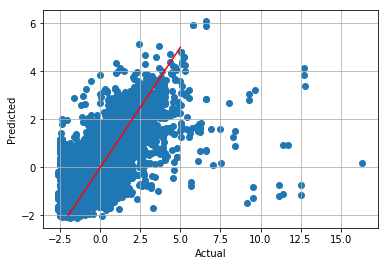

In [40]:
plt.scatter(ystest,ys_ts_pred)
plt.plot([-2,5],[-2,5],'r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True)

#### 5.3.4 Fitting the data(80 hidden units)

We try to fitting the training data in the neural network, with Adam optimizer, learning rate = 0.01, and mse as loss function

In [41]:
K.clear_session()
nin = xstrain.shape[1]  # dimension of input data
nh = 80     # number of hidden units
nout = 1
model = Sequential()
model.add(Dense(nh, input_shape=(nin,),activation='relu',name='hidden'))
model.add(Dense(nout,activation=None,name='output'))

In [42]:
from keras import optimizers
opt = optimizers.Adam(lr=0.001)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['mean_squared_error'])
model.fit(xstrain, ystrain, epochs=100, batch_size=100, validation_data=(xstest,ystest),verbose=0)

#### 5.3.4.2 Predict target value on test data

We try to predict the target value on both training data and test data, and evaluate the accurate by Normalized RSS# 

In [43]:
ys_tr_pred = np.squeeze(model.predict(xstrain))
RSStrain = np.mean(((ys_tr_pred-ystrain)**2)/(np.std(ystrain)**2))
print("Normalized RSS training = {0:f}".format(RSStrain))

ys_ts_pred = np.squeeze(model.predict(xstest))
RSStest = np.mean(((ys_ts_pred-ystest)**2)/(np.std(ystest)**2))
print("Normalized RSS test = {0:f}".format(RSStest))

Normalized RSS training = 0.294675
Normalized RSS test = 0.406128


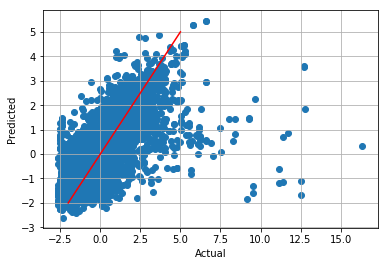

In [44]:
plt.scatter(ystest,ys_ts_pred)
plt.plot([-2,5],[-2,5],'r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True)

The Neural Network can achieve the best prediction accuracy

### 6. Conclusion
From all the tests we conducted, we believe that the model of pm2.5 prediction is likely to be a linear model

We have further get the conclusion between different models:
1. Simple first-order linear regression: Normalized RSS = 0.542290
2. Third-order linear regression: Normalized RSS = 0.417474
3. Third-order linear regression with LASSO L1 Regularization: Normalized RSS = 0.417535
4. Neural Network with 10 hidden-units: Normalized RSS：{train:0.325335}，{test:0.404074}
5. Neural Network with 20 hidden-units: Normalized RSS：{train:0.312042}，{test:0.391214}
6. Neural Network with 40 hidden-units: Normalized RSS：{train:0.306982}，{test:0.393047}
7. Neural Network with 80 hidden-units: Normalized RSS：{train:0.294675}，{test:0.406128}

For Neural Network, we tried 10, 20, 40, 80 hidden units.
From the results, with hidden unit = 10, the model is under fitting, with hidden unit = 40,80, the model is over-fitting